In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mô tả dữ liệu:
- Chủ đề : Các trận đấu World Cup từ năm 1930 - 2014
- Dữ liệu được lấy từ kaggle.com (License: CC0: Public Domain)
- Người ta thu thập dữ liệu này từ FIFA World Cup Archive website.

In [2]:
match_data = pd.read_csv('WorldCupMatches.csv')
overall_data = pd.read_csv('WorldCups.csv')

In [3]:
print(match_data.info())
match_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [4]:
match_data.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


File **WorldCupMatches.csv** chứa thông tin của những trận đấu đã diễn ra:<br>
- Có 4572 dòng và 20 cột:<br>
&emsp;&emsp;+ Year: năm diễn ra <br>
&emsp;&emsp;+ Datetime: ngày giờ diễn ra trận đấu<br>
&emsp;&emsp;+ Stage: loại vòng đấu<br>
&emsp;&emsp;+ Stadium: sân vận động - nơi diễn ra trận đấu<br>
&emsp;&emsp;+ City: thành phố diễn ra trận đấu<br>
&emsp;&emsp;+ Home Team Name: tên đội nhà<br>
&emsp;&emsp;+ Home Team Goals: số bàn thắng đội nhà ghi được<br>
&emsp;&emsp;+ Away Team Goals: tên đội khách<br>
&emsp;&emsp;+ Away Team Name: số bàn thắng đội khách ghi được<br>
&emsp;&emsp;+ Win conditions: điều kiện thắng<br>
&emsp;&emsp;+ Attendance: số lượng khán giả<br>
&emsp;&emsp;+ Half-time Home Goals: số bàn thắng đội nhà ghi được trong hiệp 1<br>
&emsp;&emsp;+ Half-time Away Goals: số bàn thắng đội khách ghi được trong hiệp 1<br>
&emsp;&emsp;+ Referee: tên trọng tài<br>
&emsp;&emsp;+ Assistant 1: trọng tài 1<br>
&emsp;&emsp;+ Assistant 2: trọng tài 2<br>
&emsp;&emsp;+ RoundID (float): số hiệu vòng đấu<br>
&emsp;&emsp;+ MatchID (float): số hiệu trận đấu<br>
&emsp;&emsp;+ Home Team Initials: viết tắt tên đội nhà<br>
&emsp;&emsp;+ Away Team Initials: viết tắt tên đội khách<br>     
- Chỉ có 852 dòng đầu là có dữ liệu <br>
- Dòng 823 và 841 bị thiếu giá trị của cột **Attendance**
- Cần chuyển kiểu dữ liệu của cột **Datetime** hiện tại sang kiểu dữ liệu thời gian.

In [5]:
print(overall_data.info())
overall_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB
None


,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [6]:
overall_data.head(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


File **WorldCups.csv** chứa kết quả của những kì World Cup đã diễn ra:<br>
- Có 20 dòng và 10 cột:<br>
&emsp;&emsp;+ Year: năm diễn ra <br>
&emsp;&emsp;+ Country: nước chủ nhà<br>
&emsp;&emsp;+ Winner: đội vô địch<br>
&emsp;&emsp;+ Runners-Up: đôi á quân<br>
&emsp;&emsp;+ Third: đội về ba<br>
&emsp;&emsp;+ Fourth: đội về tư<br>
&emsp;&emsp;+ GoalsScored: tổng số bàn thắng được ghi<br>
&emsp;&emsp;+ QualifiedTeams: tổng số đội tham dự<br>
&emsp;&emsp;+ MatchesPlayed: tổng số trận đấu đã diễn ra<br>
&emsp;&emsp;+ Attendance: tổng số khán giả<br>
 
- Cần chuyển kiểu dữ liệu của cột **Attendance** (hiện tại là kiểu *object*) sang kiểu dữ liệu số nguyên (*int*).

# TOP NHỮNG QUỐC GIA CÓ THÀNH TÍCH TỔNG CAO NHẤT CÁC KÌ WORLD CUP

## Tiền xử lí dữ liệu: 
- Tạo 3 series đếm số lần các nước đạt rank 1, rank 2 và rank 3 từ 3 cột Winner, Runner-ups và Third (file WorldCups.csv)
- Merge 3 series đó lại thành 1 bảng dữ liệu duy nhất theo tên các nước tương ứng (tức là theo index).
- Lúc này có 1 vài giá trị sẽ là NaN do không phải nước nào cũng đều đã từng nằm trong cả 3 thứ hạng -> fill những giá trị này bằng 0.
- Tạo thêm cột **Total** cho bảng dữ liệu bằng cách tính tổng 3 cột đã tính trước đó. Về mặt ý nghĩa, cột này cho biết **tổng số lần vào top 3 của mỗi nước**. 
- Sắp xếp giảm dần giá trị cột **Total**

## Phân tích dữ liệu:
- Ta biểu diễn bảng dữ liệu trên bằng biểu đồ cột chồng.
- Mỗi nước sẽ được biểu diễn bằng một cột lớn có 3 cột con chồng lên nhau thể hiện cho số lần đạt hạng 1, hạng 2 và hạng 3. Đồng thời, chiều dài của cột lớn (tức là tổng 3 cột con) thể hiện số lần giành được huy chương của nước đó trong các kì world cup (tất nhiên nằm trong top 3 là sẽ có huy chương)
- Từ biểu đồ trên ta có thể suy ra được nước nào có thành tích bóng đá cao nhất qua các mùa World Cup.

In [7]:
winners = overall_data['Winner'].value_counts()
runner_ups = overall_data['Runners-Up'].value_counts()
third = overall_data['Third'].value_counts()

In [8]:
top2 = winners.to_frame().merge(runner_ups.to_frame(), left_index=True, right_index=True, how='outer')
top3 = top2.merge(third.to_frame(), left_index=True, right_index=True, how = 'outer')
top3.fillna(0, inplace = True)
top3['Total'] = top3.values.sum(axis = 1)
top3.sort_values(by = 'Total', ascending = False, inplace = True)
top3

,Winner,Runners-Up,Third,Total
Brazil,5.0,2.0,2.0,9.0
Germany FR,3.0,3.0,1.0,7.0
Italy,4.0,2.0,1.0,7.0
Argentina,2.0,3.0,0.0,5.0
Germany,1.0,1.0,3.0,5.0
Netherlands,0.0,3.0,1.0,4.0
France,1.0,1.0,2.0,4.0
Sweden,0.0,1.0,2.0,3.0
Poland,0.0,0.0,2.0,2.0
Hungary,0.0,2.0,0.0,2.0


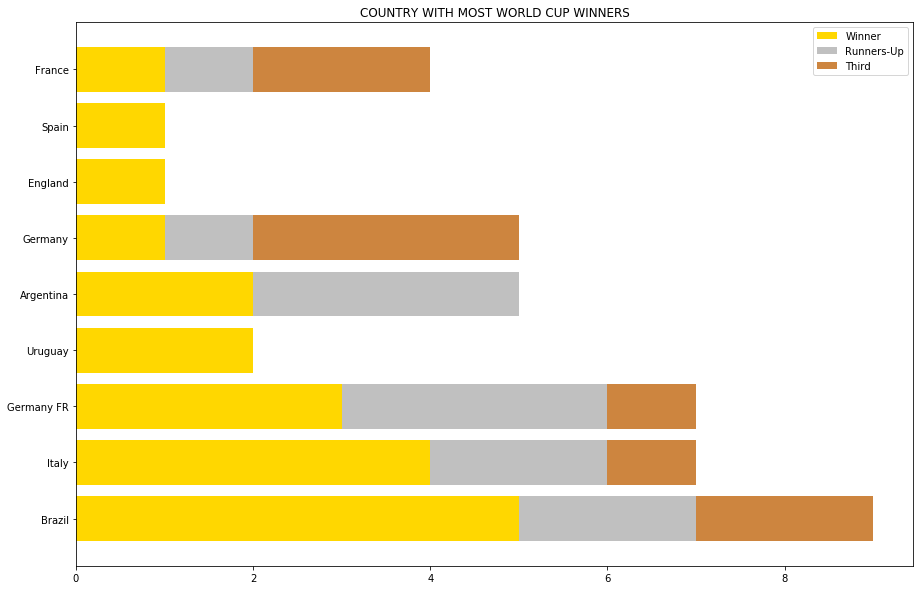

In [44]:
fig, ax = plt.subplots(figsize = (15, 10))
tmp = top3.loc[championship, :]
ax.barh(tmp.index, tmp['Winner'], color = 'gold', label = 'Winner')
ax.barh(tmp.index, tmp['Runners-Up'], left = tmp['Winner'], color = 'silver', label = 'Runners-Up')
ax.barh(tmp.index, tmp['Third'], left = tmp['Winner'] + tmp['Runners-Up'], color = 'peru', label = 'Third')
ax.set_title('COUNTRY WITH MOST WORLD CUP WINNERS')
ax.legend()

## Nhận xét:
- Brazil, Ý và CHLB Đức là 3 quốc gia có số lần vô địch World Cup nhiều nhất, đồng thời cũng là 3 nước vào top 3 nhiều nhất các kì World Cup. Có thể thấy đây chính là 3 nước có thành tích cao nhất các mùa World Cup về mọi mặt.
- Anh, Tây Ban Nha và Pháp đều có 1 lần vô địch World Cup. Tuy nhiên số lần vào top 3 của Pháp lại nhiều hơn hẳn so với 2 nước còn lại, thậm chí cao hơn cả Uruguay (đội từng có 2 lần vô địch, đang giữ vị trí thứ 4 trên BXH). Nên nhìn chung có thể đánh giá thực lực của Pháp là cao hơn so với các nước này.